# Simple Genetic Algorithm
## 1. Basic parts

First, we load necessary modules and set global parameter values.

In [1]:
# load modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['text.usetex'] = True

from ea_operators import phenotypes
from ea_operators import initialize
from ea_operators import fitness
from ea_operators import crossover
from ea_operators import mutation
from ea_operators import selection
from ea_utilities import objective_functions
from ea_utilities import visualize

from ea_algorithms.simple_ga import simple_ga

We initialize the first-generation population with random binary numbers and print it out.
Each row in the resulting matrix corresponds to one individual in the population.
Each individual encodes a corresponding integer: e.g., 01001 corresponds to
$0\cdot 2^4 + 1\cdot 2^3 + 0\cdot 2^2 + 0\cdot 2^1 + 1\cdot 2^0 = 9$.

In [2]:
# set random seed for reproducibility
np.random.seed(123)

# initializing the population
mu = 20  # population size
chromosome_length = 10  # magnitude of individuals
population = initialize.initialize_simple_ga(mu, chromosome_length)

# power to raise individuals to in the objective function
n = 2

# fitness function
fitness_function = lambda x: \
    objective_functions.simple_objective_function(
        x, n, 2**chromosome_length - 1
    )

print(population)

[[1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 1. 1. 0. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]]


Also we can visualize the population, with each dot representing a given individual
($x$ coordinate) and its corresponding fitness ($y$ coordinate).
In this notebook, we consider a very simple task of maximizing the function
$f(u) = u^n$, where $u$ is the phenotype encoded by a given individual in the population, $n \in \mathbb{N}$.

Clearly, the correct solution to this problem, for any $n > 0$, is $u = 1$,
meaning that the algorithm should be able to evolutionarily obtain a string of all 1's.

Individuals:
[ 620.  275.  993.    7.  551.  455. 1001.  473.  432.  880.  798.   93.
  630.  737.  219.  302.  439.  736.  599.  340.]
Their fitness values:
[3.67309458e-01 7.22626893e-02 9.42208959e-01 4.68214450e-05
 2.90102807e-01 1.97820605e-01 9.57451729e-01 2.13781940e-01
 1.78326640e-01 7.39969939e-01 6.08491499e-01 8.26446281e-03
 3.79253704e-01 5.19019540e-01 4.58286392e-02 8.71490422e-02
 1.84152565e-01 5.17612030e-01 3.42848598e-01 1.10460389e-01]


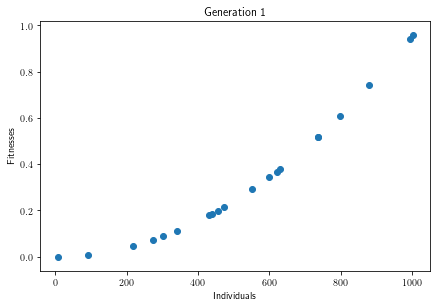

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x2906506b9c8>)

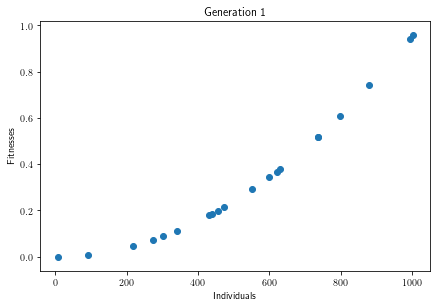

In [3]:
individuals = phenotypes.phenotype_simple_ga(population)
print("Individuals:")
print(individuals)

# the same can be achieved just by calling a fitness calculation function
# because it will also return individual phenotypes in the process
(individuals, fitnesses) = fitness.compute_fitness(
    population, phenotypes.phenotype_simple_ga,
    fitness_function
)

print("Their fitness values:")
print(fitnesses)

# let's draw
visualize.draw_population(individuals, fitnesses, 1,
                          fitness_function, 0, 2**chromosome_length - 1)

Now we can explore how simple GA one-point crossover works.
Recall that the idea is to generate a random crossover point and exchange
the tails of the two parental chromosomes after that point.
In principle, crossover can be applied to each parental pair probabilistically,
meaning that it doesn't have to happen for certain.

For illustration purposes, we will use the first two individuals to cross over.

In [5]:
child1, child2, crossover_point, crossover_indices =\
    crossover.crossover_one_point(
        population[0,], population[1,],
        prob_crossover=1, return_meta_data=True
    )

print("Crossover occured at position {}".format(crossover_point))
print("Parents:")
print(population[0,])
print(population[1,])
print("Children:")
print(child1)
print(child2)

Crossover occured at position [0]
Parents:
[1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
[0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
Children:
[[1. 1. 0. 0. 0. 1. 0. 0. 1. 1.]]
[[0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]]


Now we can explore how simple GA bit-flip mutation works.
Recall that the idea is to flip each bit from 0 to 1 and vice versa
depending on the probability of mutation.

For illustration purposes, we will use the first two individuals to mutate.

In [6]:
children, mutation_indices = mutation.mutation_bit_flip(
    population[0:2,],
    prob_mutation=0.3,
    return_meta_data=True
)
print(
    "Mutation occurred at the following indices:"
)
print(np.transpose(mutation_indices))
print(population[0:2, ])
print(children)

Mutation occured at the following indices:
[[0 8]
 [1 2]
 [1 8]]
[[1. 0. 0. 1. 1. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 1. 1.]]
[[1. 0. 0. 1. 1. 0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]]


Now that we've seen how recombination operators work, we need to discuss
two selections that need to be done:
* selection of parents to mate;
* selection of survivors in the next generation.

In the simple GA, the simplest parent selection mechanism is used, called
*fitness proportionate selection*. Basically, each individual can be selected
with probability proportional to its fitness. (Of course that means that
fitness values should be nonnegative and be higher for better individuals.)

In SGA, *generational* model of the population is used, where the offspring
obtained after crossover and mutation replace the whole population.

In [7]:
# select the parents
parent_indices = selection.selection_roulette_wheel(fitnesses)

# compute theoretical probabilities of being selected
# and actual counts
data = {'Individuals': individuals,
        'Fitnesses': fitnesses,
        'Probability of Selection': fitnesses / np.sum(fitnesses),
        'Actual Selections':
            [np.sum(parent_indices == elem) for elem in range(mu)]}
df = pd.DataFrame(data)

# add the index starting from 1
df.index = range(1, len(df) + 1)

print(df)

    Individuals  Fitnesses  Probability of Selection  Actual Selections
1         620.0   0.367309                  0.054317                  1
2         275.0   0.072263                  0.010686                  1
3         993.0   0.942209                  0.139331                  2
4           7.0   0.000047                  0.000007                  0
5         551.0   0.290103                  0.042900                  1
6         455.0   0.197821                  0.029253                  1
7        1001.0   0.957452                  0.141585                  3
8         473.0   0.213782                  0.031614                  0
9         432.0   0.178327                  0.026370                  1
10        880.0   0.739970                  0.109425                  2
11        798.0   0.608491                  0.089982                  2
12         93.0   0.008264                  0.001222                  0
13        630.0   0.379254                  0.056083            

## Maximizing $x^2$

Now we can combine everything in one big algorithm to maximize
the $f(x) = x^2$ function. Clearly, regardless of chromosome length,
the optimal solution will always be a string of all 1's. Thus, the
termination condition will be either when the global maximum is found,
or when the predefined number of generations has elapsed.

In [8]:
np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=10, n=2,
          prob_crossover=1, prob_mutation=0.001,
          generations_count=1000)

GENERATION 1
Time elapsed: 0.0 minutes(s) and 0.0 second(s).
Average fitness value --- 0.338
Best fitness value --- 0.957
Worst fitness value --- 0.000
---------------
GENERATION 2
Time elapsed: 0.0 minutes(s) and 0.0009992122650146484 second(s).
Average fitness value --- 0.599
Best fitness value --- 0.957
Worst fitness value --- 0.119
---------------
GENERATION 3
Time elapsed: 0.0 minutes(s) and 0.029998302459716797 second(s).
Average fitness value --- 0.671
Best fitness value --- 0.982
Worst fitness value --- 0.364
---------------
GENERATION 4
Time elapsed: 0.0 minutes(s) and 0.032000064849853516 second(s).
Average fitness value --- 0.744
Best fitness value --- 0.982
Worst fitness value --- 0.367
---------------
GENERATION 5
Time elapsed: 0.0 minutes(s) and 0.03500247001647949 second(s).
Average fitness value --- 0.771
Best fitness value --- 0.973
Worst fitness value --- 0.359
---------------
GENERATION 6
Time elapsed: 0.0 minutes(s) and 0.03699851036071777 second(s).
Average fitness

We can also decide to visualize either the current population, or
some statistics about fitness values in each population, or both.

KeyboardInterrupt: 

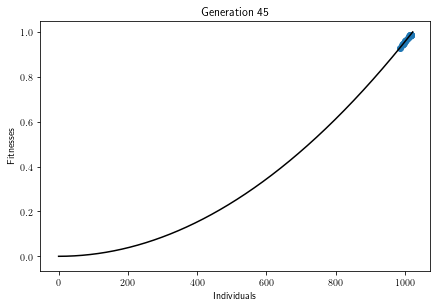

In [2]:
np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=10, n=2,
          prob_crossover=1, prob_mutation=0.001,
          generations_count=1000,
          do_draw_population=True)

Finished because the perfect solution has been found!
The final generation was 54.


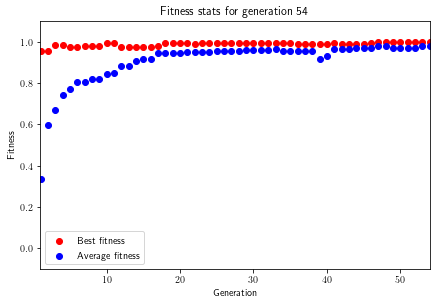

In [10]:
np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=10, n=2,
          prob_crossover=1, prob_mutation=0.001,
          generations_count=1000,
          do_draw_stats=True)

KeyboardInterrupt: 

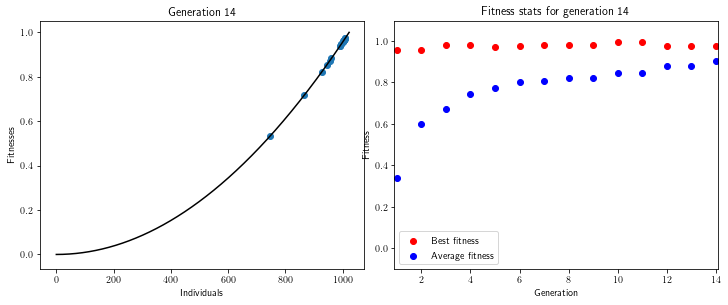

In [2]:
np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=10, n=2,
          prob_crossover=1, prob_mutation=0.001,
          generations_count=1000,
          do_draw_population=True,
          do_draw_stats=True)

We can try to increase the problem complexity by switching from $x^2$ to,
say, $x^{10}$. As we can see, the "path" to the optimum becomes much
flatter, which means that it would presumable take much more effort
for the algorithm to figure out what is going on.

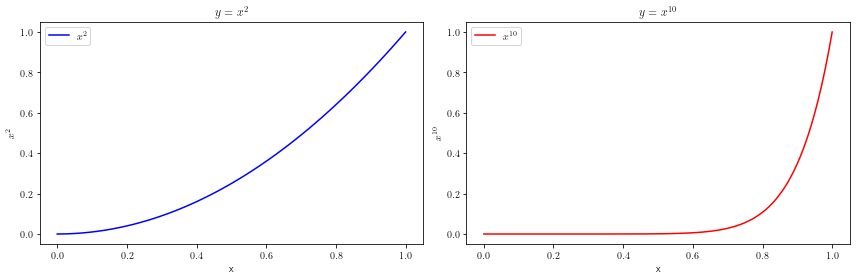

In [12]:
# generate x values from 0 to 1
x = np.linspace(0, 1, 100)

# calculate y values for x^2 and x^10
y1 = x**2
y2 = x**10

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Custom width and height

# plot y1 (x^2) in the first subplot
ax1.plot(x, y1, label='$x^2$', color='blue')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$x^2$')
ax1.set_title('$y = x^2$')
ax1.legend()

# plot y2 (x^10) in the second subplot
ax2.plot(x, y2, label='$x^{10}$', color='red')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$x^{10}$')
ax2.set_title('$y = x^{10}$')
ax2.legend()

# adjust the layout to prevent overlapping labels
plt.tight_layout()

# show the plot
plt.show()

Another way to increase complexity is to increase the chromosome length,
say, from 10 to 30. In this case the search space becomes much larger.

Let's see how the simple GA performs in this case.

In [13]:
np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=30, n=10,
          prob_crossover=1.0, prob_mutation=0.001,
          generations_count=1000, do_print=False)

Finished because the perfect solution has been found!
The final generation was 360.


As we can see, it took many more generations than the simpler version of the problem.

Feel free to play around with other parameters:
* rising mutation probability makes behavior more erratic;
* lowering crossover probability makes behavior more erratic.

In [16]:
np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=30, n=10,
          prob_crossover=1.0, prob_mutation=0.4,
          generations_count=1000, do_print=False)

np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=30, n=10,
          prob_crossover=0.5, prob_mutation=0.001,
          generations_count=1000, do_print=False)

np.random.seed(123)
population, individuals, fitnesses, generation_final, success =\
    simple_ga(mu=20, chromosome_length=30, n=10,
          prob_crossover=0.9, prob_mutation=0.01,
          generations_count=1000, do_print=False)

The final generation was 1000.
Finished because the perfect solution has been found!
The final generation was 525.
Finished because the perfect solution has been found!
The final generation was 360.


(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
         1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
         0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
         1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
         1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.],
        [1., 1., 1., 1., 1.

As was discussed in lectures, to overcome premature convergence,
we can use linear fitness scaling. We transform current fitness
values $f(x)$ to get updated ones, $g(x)$, as follows:

$$g(x) = af(x) + b$$

Coefficients $a$ and $b$ have to satisfy the following constraints:

\begin{align*}
    \frac{1}{\mu}\sum_{i=1}^\mu g(x_i) &= \frac{1}{\mu}\sum_{i=1}^\mu f(x_i)\\
    \max_{i = 1,\ldots, \mu}{g(x_i)} &= C_m \max_{i = 1,\ldots, \mu}{f(x_i)}
\end{align*}

If, however, application of this formula leads to negative fitness values, the following two conditions need to be satisfied:

\begin{align*}
    \frac{1}{\mu}\sum_{i=1}^\mu g(x_i) &= \frac{1}{\mu}\sum_{i=1}^\mu f(x_i)\\
    \min_{i = 1,\ldots, \mu}{g(x_i)} &= 0
\end{align*}

To compare the two versions of SGA, we will run each of them
several times and report mean and standard deviation of
the last generation numbers.

In [3]:
ga_function_wo_scaling =\
    lambda: simple_ga(mu=20, chromosome_length=30, n=10,
        prob_crossover=1.0, prob_mutation=0.001,
        generations_count=1000, do_print=False,
        suppress_output=True)

visualize.report_average_ga_progress(
    ga_function_wo_scaling, T=10, random_seed=123
)

ga_function_w_scaling =\
    lambda: simple_ga(mu=20, chromosome_length=30, n=10,
        prob_crossover=1.0, prob_mutation=0.001,
        generations_count=1000, do_print=False,
        do_scale=True, suppress_output=True)

visualize.report_average_ga_progress(
    ga_function_w_scaling, T=10, random_seed=123
)

Without linear scaling:
Total number of successes: 7.0
Mean final generation:521.5
Std of final generations:384.53615636966515
Without linear scaling:
Total number of successes: 10.0
Mean final generation:166.6
Std of final generations:78.74177205693726
